# CS 1656 – Introduction to Data Science 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Evangelos Karageorgos
### Additional credits: Xiaoting Li, Tahereh Arabghalizi, Zuha Agha, Anatoli Shein, Phuong Pham
## Recitation : SQL via Data API
---
In this recitation, you will execute SQL queries on real data by connecting to the open data portal of [Western Pennsylavnia Regional Data Center](https://www.wprdc.org/) and requesting data via API calls.  

In [1]:
import json
from datetime import datetime, timedelta, date
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

We will be using Allegheny County Restaurant/Food Facility Inspection Violation Dataset found here https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations. This dataset contains violation data from actual routine inspections by one of health department staff's members for the last two years. It should be fun to find out inspection results for places where we eat in Pittsburgh! =)

In [2]:
wprdc_api_endpoint = "https://data.wprdc.org/api/3/action/datastore_search_sql"

# id for database table
resource_id = "1a1329e2-418c-4bd3-af2c-cc334e7559af"

# Get the date from 270 days ago)
# end_date = datetime.now()
# start_date = end_date - timedelta(days=270)

# Get two date endpoints
start_date = date(2018, 9, 1)
end_date = date(2019, 6, 1)

# Convert to a string the format the the data center accepts (yyyy-mm-dd)
start_str = start_date.strftime("%Y-%m-%d")
end_str = end_date.strftime("%Y-%m-%d")

# SQL query we'll use in API call to request data
query = """
SELECT *
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND "city" = '{}'""".format(resource_id, start_str, end_str, "Pittsburgh")

# Make WPRDC API Call
response = requests.get(wprdc_api_endpoint, {'sql': query})

# Parse response JSON into python dictionary
response_data = json.loads(response.text)

# Convert dictionary to dataframe
df = pd.DataFrame.from_dict(response_data['result']['records'])

# Print the number of rows
print(df.shape[0], "rows total")
print(df.columns)
df.head()


19245 rows total
Index(['inspect_dt', '_geom', 'rating', 'bus_st_date', 'high', 'street', 'id',
       'municipal', 'city', 'zip', 'state', 'low', 'facility_name',
       '_the_geom_webmercator', 'medium', 'description', 'start_time',
       'placard_st', 'description_new', 'encounter', 'url', '_full_text',
       'num', 'end_time', '_id'],
      dtype='object')


,inspect_dt,_geom,rating,bus_st_date,high,street,id,municipal,city,zip,...,description,start_time,placard_st,description_new,encounter,url,_full_text,num,end_time,_id
0,2018-12-14,None,V,1999-07-27,F,Oakland Avenue,199907290002,Pittsburgh-104,Pittsburgh,15213,...,Restaurant without Liquor,13:00:00,1,Facilities to Maintain Temperature,201812140018,http://appsrv.alleghenycounty.us/reports/rwser...,'-07':2 '-104':37 '-12':28 '-14':29 '-27':3 '/...,125,14:10:00,2823789
1,2018-12-14,None,V,1999-07-27,F,Oakland Avenue,199907290002,Pittsburgh-104,Pittsburgh,15213,...,Restaurant without Liquor,13:00:00,1,Date Marking of Food,201812140018,http://appsrv.alleghenycounty.us/reports/rwser...,'-07':2 '-104':37 '-12':28 '-14':29 '-27':3 '/...,125,14:10:00,2823790
2,2018-12-14,None,V,1999-07-27,F,Oakland Avenue,199907290002,Pittsburgh-104,Pittsburgh,15213,...,Restaurant without Liquor,13:00:00,1,Cleaning and Sanitization,201812140018,http://appsrv.alleghenycounty.us/reports/rwser...,'-07':2 '-104':36 '-12':27 '-14':28 '-27':3 '/...,125,14:10:00,2823791
3,2018-12-14,None,V,1999-07-27,F,Oakland Avenue,199907290002,Pittsburgh-104,Pittsburgh,15213,...,Restaurant without Liquor,13:00:00,1,"Contamination Prevention - Food, Utensils and ...",201812140018,http://appsrv.alleghenycounty.us/reports/rwser...,'-07':2 '-104':39 '-12':27 '-14':28 '-27':3 '/...,125,14:10:00,2823792
4,2018-12-14,None,V,1999-07-27,F,Oakland Avenue,199907290002,Pittsburgh-104,Pittsburgh,15213,...,Restaurant without Liquor,13:00:00,1,"Fabrication, Design, Installation and Maintenance",201812140018,http://appsrv.alleghenycounty.us/reports/rwser...,'-07':2 '-104':38 '-12':29 '-14':30 '-27':3 '/...,125,14:10:00,2823793


Details of dataset attributes are below. ((Taken from https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations/resource/1a1329e2-418c-4bd3-af2c-cc334e7559af)
![title](attribs.png)

## Queries

__Q1) Find all unique decription categories of violation in Pittsburgh restaurants over the time span (violation description[violation]).__

In [3]:
query = """
SELECT DISTINCT "description_new" as violation
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND "city" = '{}' """.format(resource_id, start_str, end_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,violation
0,General Premises
1,Lighting
2,Cold Holding Temperatures
3,Toilet Room
4,Consumer Advisory
5,Garbage and Refuse
6,Toxic Items
7,Cleaning and Sanitization
8,Demonstration of Knowledge
9,Reheating Temperatures


__Q2) Find restaurants in Pittsburgh with no violations in at least one decription category (facility name[facility], number of violations[count]).__

In [4]:
query = """
SELECT "facility_name" as facility, COUNT("description_new") as count
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND "city" = '{}' AND "rating" <> '{}'
GROUP BY "facility_name" """.format(resource_id, start_str, end_str, "Pittsburgh", "V")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,count,facility
0,1,3 Lakes Golf Course 19th Hole
1,1,Apollo Cafe
2,2,Atria's Restaurant & Tavern
3,1,Bae Bae's Kitchen
4,1,Barb's Country Kitchen
...,...,...
119,1,TW Kitchen
120,1,Wendy's Old Fashioned Hamburgers #521
121,1,West View Firemen's Building
122,1,Wilson's Pharmacy


### Tasks

__Tasks 1 to 4 must be implemented in Task.py__

__Task 5 must be implemented in the notebook__

__T1) Find top 30 restaurants in Pittsburgh with maximum number of violations (facility name[facility], number of violations[count]).__

In [5]:
query = """
SELECT "facility_name" as facility, COUNT("description_new") as count
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND "city" = '{}' AND "rating" = 'V'
GROUP BY facility
ORDER BY count DESC
LIMIT 30""".format(resource_id, start_str, end_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,count,facility
0,84,McDonald's
1,65,Italian Village Pizza
2,64,Dragon Town
3,59,Oishii Bento
4,59,Subway Sandwiches & Salads
5,58,Ichiban II
6,58,The Bagel Factory
7,52,Sichuan Gourmet
8,51,Winghart's
9,51,Rose Tea Cafe


Lets look more closely into the inspection results of Pitt facilities.

__T2) Find the category descriptions and their high, medium, low risk ratings for all violations at facilities that start with 'Pitt' over the past nine months (facility name[facility], violation description[violation], rating[rating], high[high], medium[medium], low[low]).__

In [6]:
query = """
SELECT "facility_name" AS facility, "description_new" as violation, "rating", "high", "medium", "low"
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND "city" = '{}' AND "facility_name" LIKE 'Pitt%'
""".format(resource_id, start_str, end_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,rating,medium,facility,violation,high,low
0,V,None,Pitt Dining / The Bridge Market,Walls and ceilings,None,T
1,V,None,Pitt Dining / The Bridge Market,Administrative,None,None
2,V,F,Pitt Dining / The Bridge Market,Facilities to Maintain Temperature,F,T
3,V,T,Pitt Dining / The Bridge Market,Handwashing Facilities,F,F
4,V,F,Pitt Dining / The Bridge Market,Pest Management,F,T
...,...,...,...,...,...,...
298,V,F,Pittsburgh Popcorn,Cleaning and Sanitization,F,T
299,V,T,Pittsburgh Popcorn,Handwashing Facilities,F,T
300,V,F,Pittsburgh Popcorn,Pest Management,F,T
301,V,F,Pittsburgh Popcorn,"Contamination Prevention - Food, Utensils and ...",F,T


Now lets look at all facilities that contain word 'Pitt'.

__T3) Find the category descriptions and their high, medium, low risk ratings for all violations at all facilities that have word 'Pitt' in their name. Note that results that contain word 'Pitt' as part of another word (e.g. 'Pittsburgh') should not be included (facility name[facility], violation description[violation], rating[rating], high[high], medium[medium], low[low])__

In [7]:
query = """
SELECT "facility_name" AS facility, "description_new" as violation, "rating", "high", "medium", "low"
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND
      "city" = '{}' AND
      ("facility_name" LIKE 'Pitt %' OR "facility_name" LIKE '% Pitt %' OR "facility_name" LIKE '% Pitt')
""".format(resource_id, start_str, end_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,rating,medium,facility,violation,high,low
0,V,None,Pitt Dining / The Bridge Market,Walls and ceilings,None,T
1,V,None,Pitt Dining / The Bridge Market,Administrative,None,None
2,V,F,Pitt Dining / The Bridge Market,Facilities to Maintain Temperature,F,T
3,V,T,Pitt Dining / The Bridge Market,Handwashing Facilities,F,F
4,V,F,Pitt Dining / The Bridge Market,Pest Management,F,T
5,V,None,Pitt Dining / The Bridge Market,Walls and ceilings,None,T
6,V,None,Pitt Dining / The Bridge Market,General Premises,None,T
7,N,None,Pitt Dining / The Bridge Market,Administrative,None,None
8,V,T,Pitt Dining Sutherland Hall / Quick Zone,Food Source/Condition,F,F
9,V,F,Pitt Dining Sutherland Hall / Quick Zone,Hot Holding Temperatures,T,F


__T4) Find top 20 facilities that have word 'Pitt' in their name and have the highest counts of violations (facility name[facility], number of violations[count]).__

In [8]:
query = """
SELECT "facility_name" as facility, COUNT("facility_name") as count
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND
      "city" = '{}' AND
      ("facility_name" LIKE 'Pitt %' OR "facility_name" LIKE '% Pitt %' OR "facility_name" LIKE '% Pitt') AND
      "rating" = 'V'
GROUP BY "facility_name"
ORDER BY count DESC
LIMIT 20
""".format(resource_id, start_str, end_str, "Pittsburgh")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

df

,count,facility
0,33,Pitt Dining Litchfield Tower (A) / Market Cent...
1,19,Pitt Dining Sutherland Hall / The Perch
2,15,Pitt Dining Cathedral Cafe Food Court
3,14,Pitt Dining Sutherland Hall / Quick Zone
4,12,Pitt Dining Bruce Hall / Forbes Street Market
5,10,Pitt Dining Litchfield Tower (A) / Quick Zone
6,9,Pitt Dining Parran Hall / Cafe
7,9,Pitt Dining Litchfield Tower (B) / Common Grounds
8,8,Pitt Dining William Pitt Union / Schenley Cafe...
9,8,Pitt Dining Fitzgerald Field House


Let's make a bar graph of these counts now

__T5) Create a bar graph of the counts from T4).__

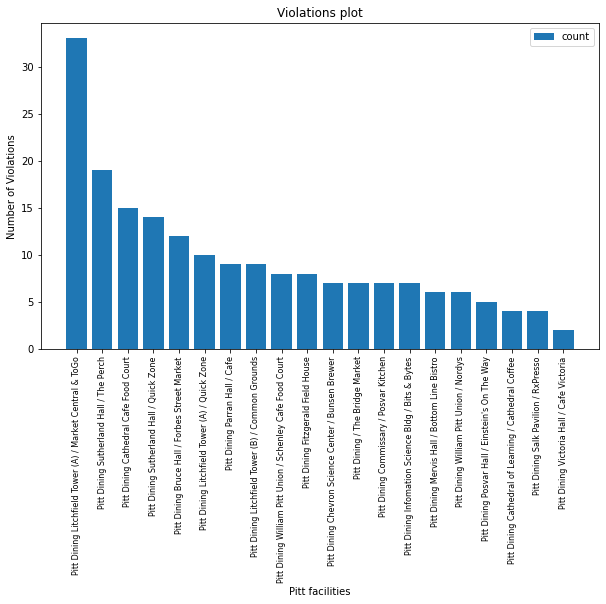

In [9]:
fig = plt.figure(figsize=(10, 6))

df2 = df
df2['count'] = df2['count'].astype(int)

p1 = plt.bar(df2['facility'], df2['count'], align='center')

plt.xticks(rotation = 90, fontsize = 8)
plt.legend(p1, ['count'])
plt.xlabel('Pitt facilities')
plt.ylabel('Number of Violations')
plt.title('Violations plot')


plt.savefig("basic_plot.png")
plt.show()

In [12]:
query = """
SELECT "facility_name" as facility, COUNT("description_new") as count
FROM "{}"
WHERE "inspect_dt" BETWEEN '{}' and '{}' AND
      "city" = '{}' AND
      ("facility_name" LIKE '{}' OR "facility_name" LIKE '{}' OR "facility_name" LIKE '{}') AND
      "rating" = '{}'
GROUP BY facility
ORDER BY count DESC
LIMIT 20
""".format(resource_id, start_str, end_str, "Pittsburgh", "% Pitt %", "Pitt %", "% Pitt", "V")

response = requests.get(wprdc_api_endpoint, {'sql': query})

df = pd.DataFrame.from_dict(json.loads(response.text)['result']['records'])

fig = plto.figure(figsize=(10,6))
plt.bar(df['facility'], df['count'])

plt.show()

NameError: name 'plto' is not defined